In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#%matplotlib notebook
%matplotlib inline

In [2]:
filename_1 = 'ex1data1.txt'
filename_2 = 'ex1data2.txt'

In [3]:
data = np.loadtxt(filename_1, delimiter = ',')

In [4]:
X = np.insert(data[:, :-1], 0, 1, axis = 1)
y = data[:, -1:]
sampleSize, numThetas = X.shape

# Visualize the data

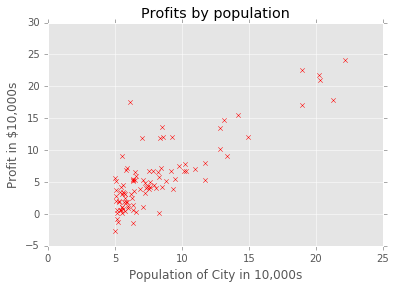

In [5]:
# Visualize the data (simple linear regression only!)
plt.scatter(X[:,1],y, c= 'red', marker = 'x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profits by population')
plt.show()

# Gradient Descent 

In [6]:
# Initilize fitting parameters
theta = np.zeros((numThetas,1))
iterations = 1500
alpha = 0.01

In [7]:
def computeCost(X,y,theta):
    '''
    Compute cost for linear regression using theta as the
    parameter for linear regression to fit the data points in X and y
    '''
    J = np.sum((np.dot(X, theta) - y)**2)/(2*sampleSize)
    return J
    
def gradientDescent(theta, alpha, X, y, iterations):
    '''
    Performs gradient descent to learn theta
    Updates theta by taking num_iters gradient steps with learning rate alpha
    '''
    J_history = []
    theta = np.zeros((numThetas,1))
    for i in range(iterations):
        theta = theta - alpha * 1/sampleSize * np.dot(X.T, (np.dot(X, theta) - y))
        J_history += [computeCost(X,y,theta)]
    return theta, J_history
    
def selectLearningRate(X, y):
    iterations = 50
    for i in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]:
        theta = np.zeros((numThetas,1))        
        alpha = i
        J_history = gradientDescent(theta, alpha, X, y, iterations)[1]
        plt.plot(range(iterations), J_history, label = str(i))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Learning Rates (alpha)')
    plt.legend(loc = 'upper right', title = 'alpha')
    plt.show()

In [8]:
thetaFit, J_history = gradientDescent(theta, alpha, X, y, iterations)
print('theta0 = ' + str(round(thetaFit[0][0], 2)) 
    + '\ntheta1 = ' + str(round(thetaFit[1][0], 2)))

theta0 = -3.63
theta1 = 1.17


In [9]:
computeCost(X,y,theta)

32.072733877455676

### Visulization of cost function and linear regression fit

In [10]:
def visualizeConvergence(iterations, J_history):
    '''
    Visualize how the convergence of cost function to its minimum 
    Takes in number of iterations and vector of cost function values for each 
    iteration (cost function history)
    '''
    plt.plot(range(iterations), J_history)
    plt.show()

def visualizeRegression():
    '''
    Visualize the simple (!) linear regression based on thetas resulted 
    from Gradient Descent
    '''
    plt.scatter(X[:,1],y, c= 'red', marker = 'x')
    plt.plot(X[:,1], np.dot(X, thetaFit), color = 'blue')
    #plt.xlim(min(X[:,1]), max(X[:,1]))
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Profits by population')
    plt.show()

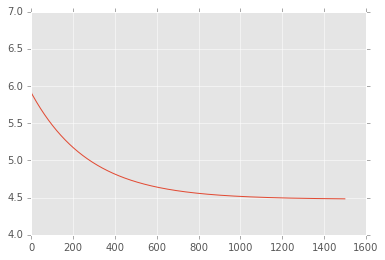

In [11]:
visualizeConvergence(iterations, J_history)

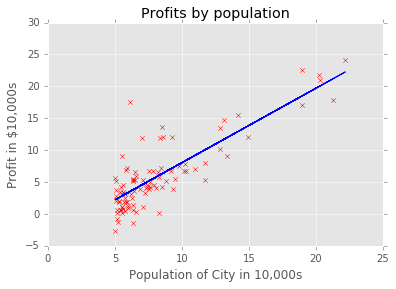

In [12]:
visualizeRegression()

### Make predictions based on new thetas

In [13]:
point1 = np.array((1,3.5)).reshape(1,2)
point2 = np.array((1,7)).reshape(1,2)
predict1 = np.dot(point1,thetaFit)
predict2 = np.dot(point2,thetaFit)
print(round(predict1[0][0],2))
print(round(predict2[0][0],2))

0.45
4.53


# Multiple linear regression

In [14]:
data = np.loadtxt(filename_2, delimiter = ',')

In [15]:
X = np.insert(data[:, :-1], 0, 1, axis = 1)
y = data[:, -1:]
sampleSize, numThetas = X.shape

In [16]:
# Initilize fitting parameters
theta = np.zeros((numThetas,1))
iterations = 1500
alpha = 0.01

## Feature normalization

In [17]:
def normalize(X):
    copy = X.copy()
    if X.shape[1] <= 1:    
        for i in range(X.shape[1]):
            copy[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
    else:
        for i in range(1, X.shape[1]):
            copy[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
    return copy

In [18]:
norm_X = normalize(X)
norm_y = normalize(y)

In [19]:
computeCost(norm_X,norm_y,theta)

0.5

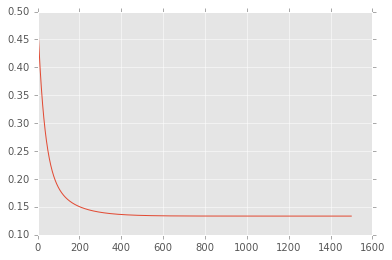

In [20]:
thetaFit, J_history = gradientDescent(theta, alpha, norm_X, norm_y, iterations)
visualizeConvergence(iterations, J_history)

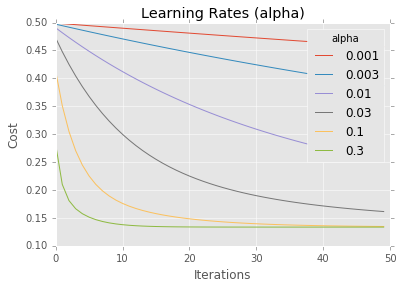

In [21]:
selectLearningRate(X = norm_X, y = norm_y)